# 기본 모듈

In [176]:
import numpy as np 
import pandas as pd 
import seaborn as sb 
import matplotlib.pyplot as plt
import mglearn
import joblib

from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.datasets import load_iris, load_wine
from statsmodels.graphics.tsaplots import plot_acf, acf

from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img, img_to_array
from statsmodels.tsa.stattools import adfuller

from sklearn.cluster import KMeans 

import warnings
warnings.simplefilter('ignore')


# 27. 강아지 고양이 이미지 분류

In [2]:
data_generator = ImageDataGenerator( rescale = 1./255 )
traingen = data_generator.flow_from_directory( 'myimg', target_size = (98, 98), class_mode = 'sparse', seed = 1 )

Found 32 images belonging to 2 classes.


In [4]:
traingen.class_indices

{'cat': 0, 'dog': 1}

In [5]:
x_train, y_train = traingen.next()

In [6]:
x_train

array([[[[0.8470589 , 0.85098046, 0.8588236 ],
         [0.85098046, 0.854902  , 0.86274517],
         [0.854902  , 0.8588236 , 0.86666673],
         ...,
         [0.85098046, 0.854902  , 0.86274517],
         [0.85098046, 0.854902  , 0.86274517],
         [0.85098046, 0.854902  , 0.86274517]],

        [[0.8470589 , 0.85098046, 0.8588236 ],
         [0.85098046, 0.854902  , 0.86274517],
         [0.85098046, 0.854902  , 0.86274517],
         ...,
         [0.85098046, 0.854902  , 0.86274517],
         [0.85098046, 0.854902  , 0.86274517],
         [0.85098046, 0.854902  , 0.86274517]],

        [[0.85098046, 0.854902  , 0.86274517],
         [0.85098046, 0.854902  , 0.86274517],
         [0.854902  , 0.8588236 , 0.86666673],
         ...,
         [0.85098046, 0.854902  , 0.86274517],
         [0.85098046, 0.854902  , 0.86274517],
         [0.85098046, 0.854902  , 0.86274517]],

        ...,

        [[0.92549026, 0.93725497, 0.9568628 ],
         [0.9215687 , 0.9333334 , 0.95294124]

In [7]:
y_train

array([1., 0., 1., 1., 1., 1., 1., 1., 1., 0., 1., 0., 1., 1., 0., 0., 1.,
       0., 0., 0., 1., 0., 1., 0., 0., 1., 1., 0., 0., 0., 0., 0.],
      dtype=float32)

In [12]:
x_train.shape

(32, 98, 98, 3)

In [10]:
x_data = x_train.reshape(32, -1)   # 98 x 98 x 3 = 28812

In [11]:
x_data.shape

(32, 28812)

In [13]:
model = MLPClassifier( verbose = 1 )
model.fit(x_data, y_train)

Iteration 1, loss = 0.84443504
Iteration 2, loss = 7.97150850
Iteration 3, loss = 7.84918575
Iteration 4, loss = 6.42065075
Iteration 5, loss = 7.12956300
Iteration 6, loss = 6.85469361
Iteration 7, loss = 5.97993977
Iteration 8, loss = 4.25327569
Iteration 9, loss = 2.06693860
Iteration 10, loss = 0.64580317
Iteration 11, loss = 2.24101769
Iteration 12, loss = 3.20189463
Iteration 13, loss = 3.43324271
Iteration 14, loss = 3.08630152
Iteration 15, loss = 2.26093402
Iteration 16, loss = 1.13231913
Iteration 17, loss = 0.57068668
Iteration 18, loss = 1.29675345
Iteration 19, loss = 1.85028188
Iteration 20, loss = 1.95576442
Iteration 21, loss = 1.65830085
Iteration 22, loss = 1.75514204
Iteration 23, loss = 0.51655993
Iteration 24, loss = 0.74758379
Iteration 25, loss = 1.20867909
Iteration 26, loss = 1.35207496
Iteration 27, loss = 1.14174037
Iteration 28, loss = 0.71474019
Iteration 29, loss = 0.45731045
Iteration 30, loss = 0.64842530
Iteration 31, loss = 0.89194227
Iteration 32, los

MLPClassifier(verbose=1)

In [14]:
model.score(x_data, y_train)

1.0

In [17]:
imgdata = load_img('k.jpg', target_size = (98, 98))

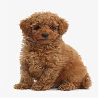

In [18]:
imgdata

In [19]:
type(imgdata)

PIL.Image.Image

In [22]:
testimg = img_to_array( imgdata ) / 255
testimg

array([[[0.9647059 , 0.9647059 , 0.9647059 ],
        [0.9647059 , 0.9647059 , 0.9647059 ],
        [0.9647059 , 0.9647059 , 0.9647059 ],
        ...,
        [0.9647059 , 0.9647059 , 0.9647059 ],
        [0.9647059 , 0.9647059 , 0.9647059 ],
        [0.9647059 , 0.9647059 , 0.9647059 ]],

       [[0.9647059 , 0.9647059 , 0.9647059 ],
        [0.9647059 , 0.9647059 , 0.9647059 ],
        [0.9647059 , 0.9647059 , 0.9647059 ],
        ...,
        [0.9647059 , 0.9647059 , 0.9647059 ],
        [0.9647059 , 0.9647059 , 0.9647059 ],
        [0.9647059 , 0.9647059 , 0.9647059 ]],

       [[0.9647059 , 0.9647059 , 0.9647059 ],
        [0.9647059 , 0.9647059 , 0.9647059 ],
        [0.9647059 , 0.9647059 , 0.9647059 ],
        ...,
        [0.9647059 , 0.9647059 , 0.9647059 ],
        [0.9647059 , 0.9647059 , 0.9647059 ],
        [0.9647059 , 0.9647059 , 0.9647059 ]],

       ...,

       [[0.9647059 , 0.9647059 , 0.9647059 ],
        [0.9647059 , 0.9647059 , 0.9647059 ],
        [0.9647059 , 0

In [24]:
testimg.shape

(98, 98, 3)

In [25]:
model.predict( testimg.reshape(1, -1) )

array([0.], dtype=float32)

## 모델저장

In [26]:
import joblib

In [27]:
joblib.dump( model, 'catdog.pkl' )

['catdog.pkl']

## 모델 읽기

In [29]:
mymodel = joblib.load('catdog.pkl')

In [31]:
mymodel.predict(testimg.reshape(1, -1))

array([0.], dtype=float32)

# 28. kmeans

In [32]:
from sklearn.cluster import KMeans 
import numpy as np 
import pandas as pd 
import seaborn as sb 
import matplotlib.pyplot as plt
import mglearn

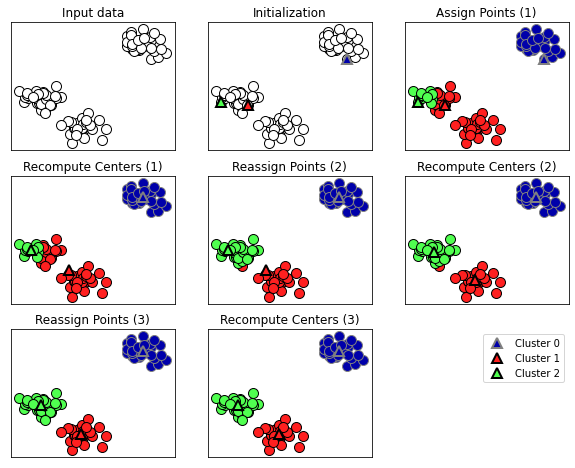

In [33]:
mglearn.plots.plot_kmeans_algorithm()

In [35]:
df = pd.read_csv('data5/kmean.csv', index_col = 'Unnamed: 0')
df

,x,y
0,2,3
1,2,11
2,2,18
3,4,5
4,4,7
5,5,3
6,5,15
7,6,6
8,6,8
9,6,9


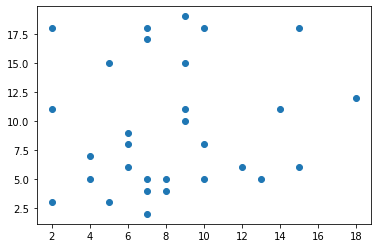

In [37]:
plt.scatter(df['x'], df['y'])
plt.show()

## 비지도학습 (군집분류)

In [40]:
k = KMeans(n_clusters = 4)
km = k.fit(df)

In [41]:
type(km)

sklearn.cluster._kmeans.KMeans

In [43]:
cen = km.cluster_centers_
cen

array([[ 3.        , 14.66666667],
       [ 6.15384615,  5.07692308],
       [ 9.5       , 17.5       ],
       [12.5       ,  8.625     ]])

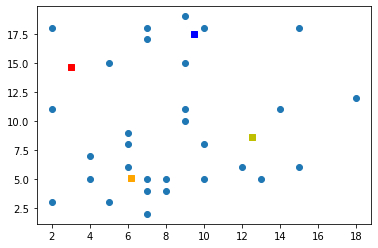

In [49]:
plt.scatter(df['x'], df['y'])
plt.scatter(cen[: ,0], cen[:, 1], marker = 's', c = ['r', 'orange', 'b', 'y'])
plt.show()

In [50]:
km.labels_

array([1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 2, 2, 1, 1, 3, 3, 2, 2, 1,
       3, 2, 3, 3, 3, 3, 2, 3])

In [51]:
df['labels'] = km.labels_

In [52]:
df

,x,y,labels
0,2,3,1
1,2,11,0
2,2,18,0
3,4,5,1
4,4,7,1
5,5,3,1
6,5,15,0
7,6,6,1
8,6,8,1
9,6,9,1


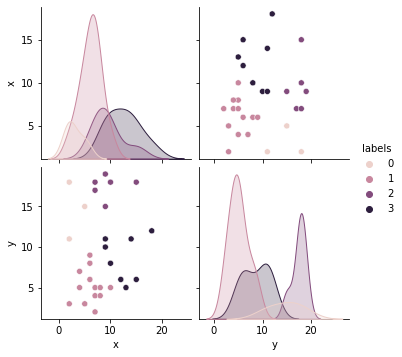

In [56]:
sb.pairplot(df, hue = 'labels')
plt.show()

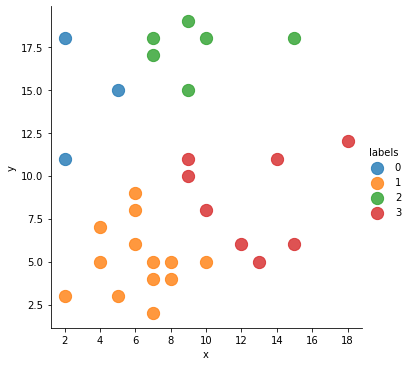

In [58]:
sb.lmplot(x = 'x', y = 'y', data = df, hue = 'labels', fit_reg = False, scatter_kws={'s' : 150})
plt.show()

km.inertia_   : 각 센터를 중심으로 떨어진 거리의 총합의 평균

In [60]:
data = []
for n in range(1, 11) :
    model = KMeans(n_clusters = n)
    km = model.fit(df)
    data.append( km.inertia_ )
    
data

[1353.2333333333333,
 659.3397129186603,
 395.5178571428571,
 305.6703296703297,
 235.49365079365077,
 192.2936507936508,
 162.7936507936508,
 125.06666666666669,
 91.82857142857144,
 73.56666666666666]

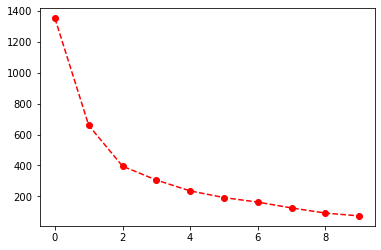

In [63]:
plt.plot(data, 'ro--')
plt.show()

군집분류 할때 급격히 떨어지다가 완만하게 바뀌는 4~6 정도의 군집 설정이 가장 적합하다

iris 데이터 특성데이터(sl, sw, pl. pw) 를 이용하여 군집분류를 수행하고 pairplot을 그리고 실제값과 정확도를 확인하시오

In [150]:
from sklearn.datasets import load_iris
iris = load_iris()
data = pd.DataFrame(iris['data'], columns = iris['feature_names'])
target = iris['target']

In [151]:
data

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [152]:
from sklearn.cluster import KMeans 
k = KMeans(n_clusters = 3)
km = k.fit(data)

In [153]:
cen = km.cluster_centers_
cen

array([[5.006     , 3.428     , 1.462     , 0.246     ],
       [5.9016129 , 2.7483871 , 4.39354839, 1.43387097],
       [6.85      , 3.07368421, 5.74210526, 2.07105263]])

In [154]:
km.labels_ == iris['target']

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True, False,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True, False,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True, False,  True,  True,  True,  True, False,  True,
        True,  True,  True,  True,  True, False, False,  True,  True,
        True,  True, False,  True, False,  True, False,  True,  True,
       False, False,

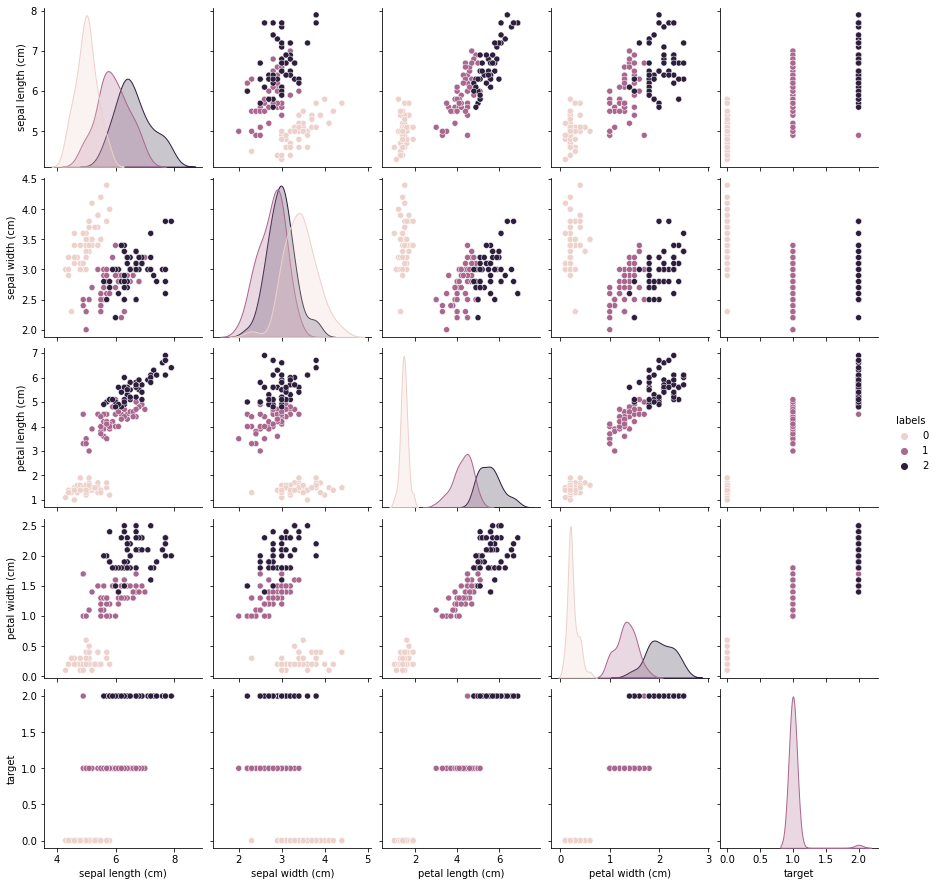

In [131]:
sb.pairplot(data, hue = 'labels')
plt.show()

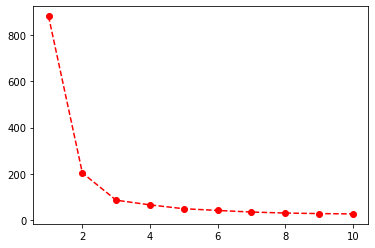

In [132]:
lst = []
for n in range(1, 11) :
    model = KMeans(n_clusters = n)
    km = model.fit(data)
    lst.append( km.inertia_ )
    
plt.plot(range(1,11), lst, 'ro--')
plt.show()

# 29. 차원축소

In [155]:
from sklearn.datasets import load_iris, load_wine
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
import matplotlib.pyplot as plt

In [156]:
iris = load_iris()

In [159]:
irisDF = pd.DataFrame(iris['data'], columns = ['sl', 'sw',  'pl',  'pw'])
irisDF

,sl,sw,pl,pw
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


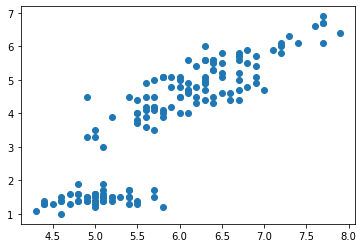

In [161]:
plt.scatter(irisDF['sl'], irisDF['pl'])
plt.show()

In [163]:
color=[]
for n in iris.target:
    if n==0:
        color.append('r')
    elif n==1:
        color.append('g')
    else:
        color.append('b')

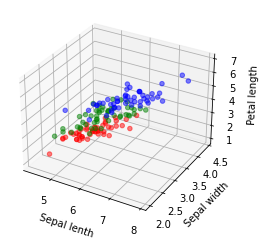

In [164]:
fig = plt.figure()
ax = fig.gca(projection='3d' )
ax.scatter(irisDF['sl'],irisDF['sw'],
           irisDF['pl'],  alpha=0.5,c=color)
ax.set_xlabel('Sepal lenth')
ax.set_ylabel('Sepal width')
ax.set_zlabel('Petal length')
plt.show()


In [171]:
irisDF.shape

(150, 4)

In [169]:
model = PCA(n_components = 2)
pcaf = model.fit_transform(irisDF)

In [170]:
pcaf.shape

(150, 2)

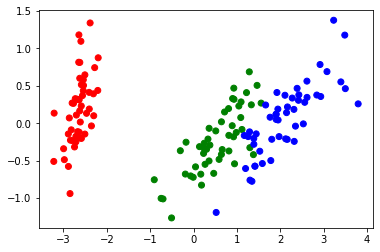

In [174]:
plt.scatter(pcaf[:, 0], pcaf[:, 1], c = color)
plt.show()

In [175]:
model.transform([[3, 2, 1, 2]])

array([[-3.01400139, -2.2211981 ]])

## wine 데이터셋을 2차원으로 차원축소 후 분류를 확인하시오

In [178]:
from sklearn.datasets import load_wine
wine = load_wine()
wine_data = pd.DataFrame(wine['data'], columns = wine['feature_names'])
wine_data

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,2.45,20.5,95.0,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740.0
174,13.40,3.91,2.48,23.0,102.0,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750.0
175,13.27,4.28,2.26,20.0,120.0,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835.0
176,13.17,2.59,2.37,20.0,120.0,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840.0


In [179]:
wine_data.shape

(178, 13)

In [180]:
model = PCA(n_components = 2)
pcaf = model.fit_transform(wine_data)

In [181]:
pcaf.shape

(178, 2)

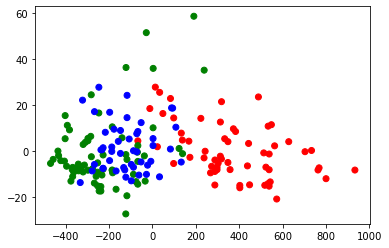

In [184]:
color=[]
for n in wine.target:
    if n==0:
        color.append('r')
    elif n==1:
        color.append('g')
    else:
        color.append('b')

plt.scatter(pcaf[:, 0], pcaf[:, 1], c = color)
plt.show()

In [185]:
model.inverse_transform([[400, 16]])

array([[1.36835784e+01, 2.09842180e+00, 2.51797823e+00, 1.80496299e+01,
        1.22878283e+02, 2.70509163e+00, 2.65535537e+00, 2.90947605e-01,
        1.91121240e+00, 6.23055281e+00, 1.01379868e+00, 2.83773222e+00,
        1.14653805e+03]])

# 30. 시계열 예측`

In [186]:
from statsmodels.tsa.ar_model import AR
from statsmodels.tsa.arima_model import ARIMA

from statsmodels.tsa.stattools import adfuller
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from warnings import filterwarnings
filterwarnings("ignore")

In [187]:
birthDF = pd.read_csv('data5/daily-total-female-births.txt',
                parse_dates=['Date'], index_col='Date')
birthDF

,Births
Date,
1959-01-01,35
1959-01-02,32
1959-01-03,30
1959-01-04,31
1959-01-05,44
...,...
1959-12-27,37
1959-12-28,52
1959-12-29,48


In [188]:
airDF = pd.read_csv('data5/international-airline-passengers.txt',
                   parse_dates=['time'], index_col='time')
airDF

,passengers
time,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121
...,...
1960-08-01,606
1960-09-01,508
1960-10-01,461


In [189]:
tempDF = pd.read_csv('data5/daily-min-temperatures.csv',
                    parse_dates=['Date'], index_col='Date')
tempDF

,Temp
Date,
1981-01-01,20.7
1981-01-02,17.9
1981-01-03,18.8
1981-01-04,14.6
1981-01-05,15.8
...,...
1990-12-27,14.0
1990-12-28,13.6
1990-12-29,13.5


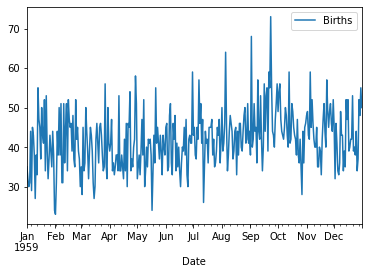

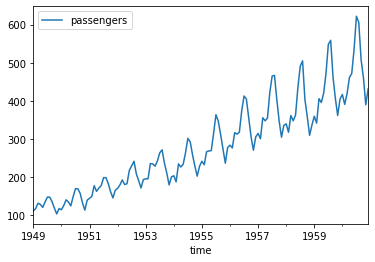

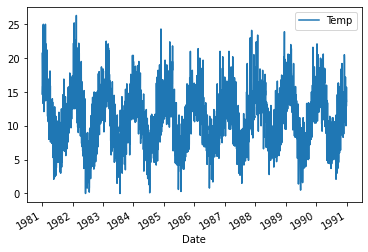

In [191]:
birthDF.plot()
plt.show()

airDF.plot()
plt.show()

tempDF.plot()
plt.show()

In [196]:
n = int(len(birthDF) / 2)
print(birthDF.iloc[ : n].mean())
print(birthDF.iloc[n : ].mean())
print(birthDF.iloc[ : n].var())
print(birthDF.iloc[n : ].var())

Births    39.763736
dtype: float64
Births    44.185792
dtype: float64
Births    49.485308
dtype: float64
Births    48.976281
dtype: float64


In [198]:
n = int(len(airDF) / 2)
print(airDF.iloc[ : n].mean())
print(airDF.iloc[n : ].mean())
print(airDF.iloc[ : n].var())
print(airDF.iloc[n : ].var())

passengers    182.902778
dtype: float64
passengers    377.694444
dtype: float64
passengers    2275.69464
dtype: float64
passengers    7471.736307
dtype: float64


In [199]:
n = int(len(tempDF) / 2)
print(tempDF.iloc[ : n].mean())
print(tempDF.iloc[n : ].mean())
print(tempDF.iloc[ : n].var())
print(tempDF.iloc[n : ].var())

Temp    11.043507
dtype: float64
Temp    11.312
dtype: float64
Temp    18.170782
dtype: float64
Temp    14.961956
dtype: float64


In [200]:
tempDF['days'] = range(0, len(tempDF))
tempDF

,Temp,days
Date,,
1981-01-01,20.7,0
1981-01-02,17.9,1
1981-01-03,18.8,2
1981-01-04,14.6,3
1981-01-05,15.8,4
...,...,...
1990-12-27,14.0,3645
1990-12-28,13.6,3646
1990-12-29,13.5,3647


In [202]:
temps = tempDF['Temp'].values
days = tempDF['days'].values

In [203]:
tempDF.corr()

,Temp,days
Temp,1.00000,0.01218
days,0.01218,1.00000


In [204]:
np.corrcoef(temps, days)

array([[1.        , 0.01218004],
       [0.01218004, 1.        ]])

In [207]:
temps

array([20.7, 17.9, 18.8, ..., 13.5, 15.7, 13. ])

In [205]:
temps[1 : ]

array([17.9, 18.8, 14.6, ..., 13.5, 15.7, 13. ])

In [206]:
temps[ : -1]

array([20.7, 17.9, 18.8, ..., 13.6, 13.5, 15.7])

In [208]:
np.corrcoef(temps[1 : ], temps[ : -1]) # lag1

array([[1.        , 0.77487022],
       [0.77487022, 1.        ]])

In [210]:
np.corrcoef(temps[3 : ], temps[ : -3]) # lag2

array([[1.        , 0.58637486],
       [0.58637486, 1.        ]])

In [209]:
autocorrelation=[]
for shift in range(1,10):
    c = np.corrcoef(temps[:-shift], temps[shift:] )[0,1]
    autocorrelation.append( c )
autocorrelation

[0.7748702165384455,
 0.6311194620684837,
 0.5863748620126277,
 0.5788976133377622,
 0.5785715744112058,
 0.5765484145122558,
 0.5759289535831575,
 0.5695569780397493,
 0.5634747178408283]

In [211]:
from statsmodels.graphics.tsaplots import plot_acf, acf

In [212]:
temps

array([20.7, 17.9, 18.8, ..., 13.5, 15.7, 13. ])

In [213]:
tempDF['Temp']

Date
1981-01-01    20.7
1981-01-02    17.9
1981-01-03    18.8
1981-01-04    14.6
1981-01-05    15.8
              ... 
1990-12-27    14.0
1990-12-28    13.6
1990-12-29    13.5
1990-12-30    15.7
1990-12-31    13.0
Name: Temp, Length: 3650, dtype: float64

In [215]:
result = acf(tempDF['Temp'])
result

array([1.        , 0.774268  , 0.6302866 , 0.58529312, 0.57774567,
       0.57728013, 0.57510412, 0.57437039, 0.56782622, 0.56120131,
       0.54668689, 0.53793111, 0.54012564, 0.54247126, 0.53688723,
       0.53429917, 0.53043593, 0.52911166, 0.53037444, 0.52280732,
       0.52303677, 0.52224579, 0.51426684, 0.49837745, 0.49302665,
       0.49946731, 0.50428521, 0.50068173, 0.49157081, 0.48146406,
       0.47421245, 0.47568054, 0.46311862, 0.46215585, 0.46630567,
       0.45459092, 0.43378232, 0.4203594 , 0.42707505, 0.42196486,
       0.4079607 ])

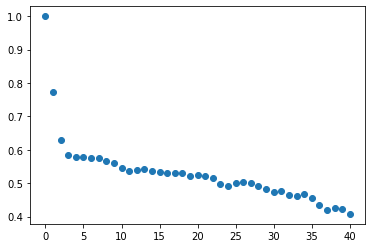

In [216]:
plt.scatter( range(0,len(result ) ), result )
plt.show()

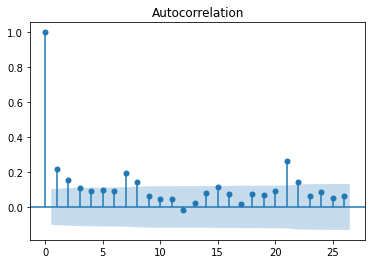

In [217]:
plot_acf( birthDF['Births'] )
plt.show()

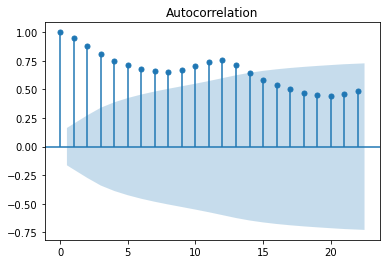

In [218]:
plot_acf( airDF['passengers'] )
plt.show()

In [219]:
from statsmodels.tsa.stattools import adfuller

#### 검증 조건 ( p-value : 5% 이내면 reject으로 대체가설 선택됨 )
- 귀무가설(H0): non-stationary.
- 대체가설 (H1): stationary.


In [220]:
result = adfuller( birthDF['Births'] )
print( result[0] ) # adf ( 작을수록 :귀무가설을 기각시킬 확율이 높다)
print( result[1] ) # p-value( 귀무가설기각: stationary)

-4.808291253559764
5.2434129901498554e-05


In [221]:
result = adfuller( airDF['passengers'] )
print( result[0] ) #adf ( 클수록: 귀무가설채틱 확률이 높다 )
print( result[1] ) # p-value( 귀무가설채택: non-stationary )

0.8153688792060512
0.991880243437641


In [225]:
order = (2, 1, 2)
model = ARIMA(airDF, order)
rfit = model.fit()

In [226]:
rfit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             ARIMA Model Results                              
==============================================================================
Dep. Variable:           D.passengers   No. Observations:                  143
Model:                 ARIMA(2, 1, 2)   Log Likelihood                -666.022
Method:                       css-mle   S.D. of innovations             24.713
Date:                Wed, 28 Jul 2021   AIC                           1344.043
Time:                        16:30:26   BIC                           1361.820
Sample:                    02-01-1949   HQIC                          1351.267
                         - 12-01-1960                                         
======================================================================================
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                  2.5311      0.708      3.574      0.000       1.143       3.919
ar.L1.D.passengers     1.6477      0.033     49.932      0.000       1.583       1.712
ar.L2.D.passengers    -0.9094      0.033    -27.879      0.000      -0.973      -0.845
ma.L1.D.passengers    -1.9098      0.065    -29.518      0.000      -2.037      -1.783
ma.L2.D.passengers     0.9997      0.068     14.809      0.000       0.867       1.132
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            0.9059           -0.5281j            1.0486           -0.0840
AR.2            0.9059           +0.5281j            1.0486            0.0840
MA.1            0.9552           -0.2964j            1.0001           -0.0479
MA.2            0.9552           +0.2964j            1.0001            0.0479
-----------------------------------------------------------------------------
"""

ARIMA(2,1,2)
\begin{equation}
y_t = 1.6477 y'_{t-1} -0.9094 y'_{t-2} + e_t -1.9101e_{t-1} +0.9999e_{t-2}
\end{equation}
</h3>
를 따르는 ARIMA모델임을 확인할 수 있다.


In [227]:
def arima_aic_check(data, order,sort = 'AIC'):
    order_list = []
    aic_list = []
    bic_lsit = []
    for p in range(order[0]):
        for d in range(order[1]):
            for q in range(order[2]):
                model = ARIMA(data, order=(p,d,q))
                try:
                    model_fit = model.fit()
                    c_order = f'p:{p} d:{d} q:{q}'
                    aic = model_fit.aic
                    bic = model_fit.bic
                    order_list.append(c_order)
                    aic_list.append(aic)
                    bic_list.append(bic)
                except:
                    pass
    result_df = pd.DataFrame(list(zip(order_list, aic_list)),columns=['order','AIC'])
    result_df.sort_values(sort, inplace=True)
    return result_df


In [228]:
arima_aic_check(airDF, [3, 3, 3])

,order,AIC
20,p:2 d:1 q:2,1344.043402
19,p:2 d:1 q:1,1361.695811
13,p:1 d:1 q:2,1371.815374
15,p:1 d:2 q:2,1393.908442
22,p:2 d:2 q:2,1394.656208
7,p:0 d:2 q:2,1396.371696
18,p:2 d:1 q:0,1397.975152
4,p:0 d:1 q:2,1398.385532
3,p:0 d:1 q:1,1398.827110
12,p:1 d:1 q:1,1402.145400


In [229]:
rfit.predict(1, 10, typ = 'levels')

1949-02-01    114.531125
1949-03-01    121.350891
1949-04-01    137.221275
1949-05-01    129.789543
1949-06-01    119.169529
1949-07-01    136.762435
1949-08-01    149.739048
1949-09-01    147.367315
1949-10-01    134.798740
1949-11-01    121.077203
Freq: MS, dtype: float64

In [231]:
airDF.head(11)

,passengers
time,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121
1949-06-01,135
1949-07-01,148
1949-08-01,148
1949-09-01,136


In [232]:
rfit.predict('1950-01-01', '1950-12-01', typ = 'levels')

1950-01-01    131.476584
1950-02-01    132.058718
1950-03-01    143.953921
1950-04-01    156.328857
1950-05-01    147.711026
1950-06-01    136.542627
1950-07-01    155.854157
1950-08-01    168.939806
1950-09-01    162.271033
1950-10-01    147.633210
1950-11-01    126.286671
1950-12-01    115.225462
Freq: MS, dtype: float64

In [233]:
preds = rfit.predict('1960-07-01', '1961-07-01', typ = 'levels')

In [234]:
train = airDF[ : '1960-07-01']
test = airDF['1960-07-01' : ]

In [236]:
train

,passengers
time,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121
...,...
1960-03-01,419
1960-04-01,461
1960-05-01,472


In [235]:
test

,passengers
time,
1960-07-01,622
1960-08-01,606
1960-09-01,508
1960-10-01,461
1960-11-01,390
1960-12-01,432


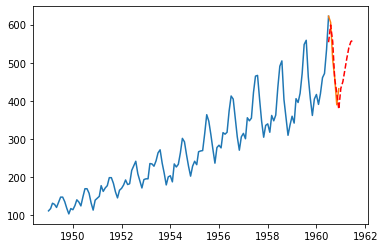

In [239]:
plt.plot(train)
plt.plot(test)
plt.plot(preds, 'r--')
plt.show()